In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import env

## acquire & summarize
1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
url = env.get_db_url("zillow")
query= '''
    SELECT prop.*,
	pred.logerror,
	pred.transactiondate,	
	cons.typeconstructiondesc,
	air.airconditioningdesc,
	arch.architecturalstyledesc,
	build.buildingclassdesc,
	land.propertylandusedesc,		
	story.storydesc
	
FROM properties_2017 prop
	INNER JOIN(SELECT parcelid, logerror, MAX(transactiondate)transactiondate
				  FROM predictions_2017
				  GROUP BY parcelid, logerror) pred
			USING (parcelid)
	LEFT JOIN typeconstructiontype cons USING (typeconstructiontypeid)
	LEFT JOIN airconditioningtype air USING (airconditioningtypeid)
	LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid)
	LEFT JOIN buildingclasstype build USING (buildingclasstypeid)
	LEFT JOIN propertylandusetype land USING (propertylandusetypeid)
	LEFT JOIN storytype story USING (storytypeid)
WHERE prop.latitude IS NOT NULL
	AND prop.longitude IS NOT NULL
	AND transactiondate LIKE '2017%%';
'''


In [3]:
df = pd.read_sql(query, url)

In [4]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,typeconstructiondesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,propertylandusedesc,storydesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,NaN,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,NaN,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,NaN,6.037300e+13,-0.103410,2017-01-01,None,None,None,None,Single Family Residential,None
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,NaN,6.037124e+13,0.006940,2017-01-01,None,Central,None,None,Condominium,None


In [5]:
df.to_csv("zillow.csv", index=False)

#### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,77574.0,1.495340e+06,8.609689e+05,3.490000e+02,7.520875e+05,1.498169e+06,2.240588e+06,2.982274e+06
parcelid,77574.0,1.300630e+07,3.478043e+06,1.071186e+07,1.153819e+07,1.253050e+07,1.421124e+07,1.676893e+08
airconditioningtypeid,25006.0,1.812045e+00,2.965823e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03
bathroomcnt,77574.0,2.298521e+00,9.967057e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77574.0,3.053252e+00,1.140447e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,49808.0,6.533830e+00,1.722041e+00,1.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,76959.0,2.316389e+00,9.796902e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77574 non-null  int64  
 1   parcelid                      77574 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77574 non-null  float64
 6   bedroomcnt                    77574 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49808 non-null  float64
 9   calculatedbathnbr             76959 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77374 non-null  float64
 13  f

In [8]:
df.shape

(77574, 67)

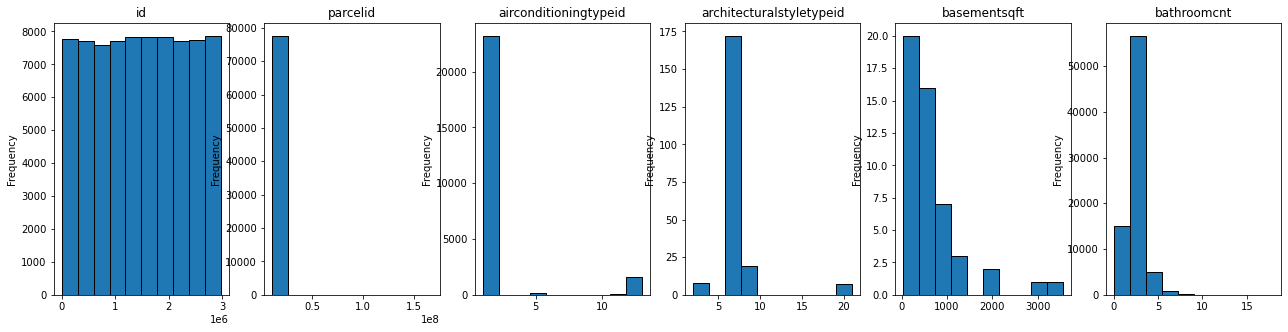

In [9]:
fig, axs = plt.subplots(1, 6, figsize=(22, 5))

for ax, col in zip(axs, df.select_dtypes('number')):
    df[col].plot.hist(ax=ax, title=col, ec='black')

In [10]:
obj_cols = [df.columns[(df.dtypes == 'O')]]
obj_cols

[Index(['propertycountylandusecode', 'propertyzoningdesc', 'taxdelinquencyflag',
        'transactiondate', 'typeconstructiondesc', 'airconditioningdesc',
        'architecturalstyledesc', 'buildingclassdesc', 'propertylandusedesc',
        'storydesc'],
       dtype='object')]

In [11]:
for col in obj_cols:
    print(col)
    print(df[col].value_counts())
    print('------------------------')

Index(['propertycountylandusecode', 'propertyzoningdesc', 'taxdelinquencyflag',
       'transactiondate', 'typeconstructiondesc', 'airconditioningdesc',
       'architecturalstyledesc', 'buildingclassdesc', 'propertylandusedesc',
       'storydesc'],
      dtype='object')
Series([], dtype: int64)
------------------------


In [12]:
df.airconditioningdesc.value_counts()

Central          23185
Yes               1575
None               167
Wall Unit           53
Refrigeration       26
Name: airconditioningdesc, dtype: int64

In [13]:
df.isnull().sum().sort_values(ascending=False)[:45]

buildingclassdesc           77559
buildingclasstypeid         77559
finishedsquarefeet13        77532
storydesc                   77524
storytypeid                 77524
basementsqft                77524
yardbuildingsqft26          77504
fireplaceflag               77402
architecturalstyletypeid    77368
architecturalstyledesc      77368
typeconstructiontypeid      77352
typeconstructiondesc        77352
finishedsquarefeet6         77188
pooltypeid10                77109
decktypeid                  76960
poolsizesum                 76705
pooltypeid2                 76500
hashottuborspa              76035
yardbuildingsqft17          75181
taxdelinquencyyear          74674
taxdelinquencyflag          74674
finishedsquarefeet15        74547
finishedsquarefeet50        71539
finishedfloor1squarefeet    71539
fireplacecnt                69287
threequarterbathnbr         67469
pooltypeid7                 62496
poolcnt                     61401
numberofstories             59978
airconditionin

##### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.


||num_rows_missing	|pct_rows_missing|
|---|---|---|
|parcelid|	0	|0.000000|
|airconditioningtypeid|	29041 |	0.535486|
|architecturalstyletypeid|	54232 |	0.999982|


In [14]:
num_rows_missing = df.isnull().sum()
num_rows_missing.head()

id                              0
parcelid                        0
airconditioningtypeid       52568
architecturalstyletypeid    77368
basementsqft                77524
dtype: int64

In [15]:
num_rows = df.shape[0]
num_rows

77574

In [16]:
# Calculate percent 
pct_rows_missing = num_rows_missing/num_rows
pct_rows_missing

id                          0.000000
parcelid                    0.000000
airconditioningtypeid       0.677650
architecturalstyletypeid    0.997344
basementsqft                0.999355
                              ...   
airconditioningdesc         0.677650
architecturalstyledesc      0.997344
buildingclassdesc           0.999807
propertylandusedesc         0.000000
storydesc                   0.999355
Length: 67, dtype: float64

In [17]:
# Make dataframe
pd.DataFrame({'number_missing_rows': num_rows_missing, 'percent_rows_missing': pct_rows_missing})

,number_missing_rows,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52568,0.677650
architecturalstyletypeid,77368,0.997344
basementsqft,77524,0.999355
...,...,...
airconditioningdesc,52568,0.677650
architecturalstyledesc,77368,0.997344
buildingclassdesc,77559,0.999807
propertylandusedesc,0,0.000000


In [18]:
def nulls_by_col(df):
    num_rows_missing = df.isnull().sum()
    pct_rows_missing = num_rows_missing/num_rows
    df_missing = pd.DataFrame({'number_missing_rows': num_rows_missing, 'percent_rows_missing': pct_rows_missing})
    return df_missing
    

In [19]:
nulls_by_col(df)

,number_missing_rows,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52568,0.677650
architecturalstyletypeid,77368,0.997344
basementsqft,77524,0.999355
...,...,...
airconditioningdesc,52568,0.677650
architecturalstyledesc,77368,0.997344
buildingclassdesc,77559,0.999807
propertylandusedesc,0,0.000000


In [20]:
nulls_by_col(df)

,number_missing_rows,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52568,0.677650
architecturalstyletypeid,77368,0.997344
basementsqft,77524,0.999355
...,...,...
airconditioningdesc,52568,0.677650
architecturalstyledesc,77368,0.997344
buildingclassdesc,77559,0.999807
propertylandusedesc,0,0.000000


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

|num_cols_missing|	pct_cols_missing|	num_rows|
|---|---|---|
|23|	38.333|	108|
|24|	40.000|	123|
|25|	41.667|	5280|

In [21]:
pd.DataFrame(df.isnull().sum(axis =1).value_counts()).reset_index()

,index,0
0,34,14891
1,33,14062
2,32,13790
3,31,11549
4,35,6299
5,29,5328
6,30,3963
7,36,3560
8,37,2084
9,28,619


In [22]:
col_missing = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index().groupby('num_cols_missing')
col_missing = col_missing.count().reset_index().rename(columns = {'index': 'num_rows'})

col_missing['pct_cols_missing'] = col_missing.num_cols_missing/df.shape[1]
col_missing

,num_cols_missing,num_rows,pct_cols_missing
0,23,4,0.343284
1,24,14,0.358209
2,25,34,0.373134
3,26,129,0.388060
4,27,498,0.402985
5,28,619,0.417910
6,29,5328,0.432836
7,30,3963,0.447761
8,31,11549,0.462687
9,32,13790,0.477612


In [23]:
def cols_missing(df):
    df = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    df['pct_cols_missing'] = df.num_cols_missing/df.shape[1]
    return df

In [24]:
cols_missing(df).sort_values(by=['pct_cols_missing'], ascending=False)

,num_cols_missing,num_rows,pct_cols_missing
24,47,3,23.5
23,46,3,23.0
22,45,5,22.5
21,44,50,22.0
20,43,79,21.5
19,42,29,21.0
18,41,26,20.5
17,40,29,20.0
16,39,230,19.5
15,38,296,19.0


## Prepare

 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

 

In [25]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

 - The input:
      - A datafram:
      - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing):
      - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

 - The output:
      - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

 - hint:
      - Look up the dropna documentation:
      - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns:
      - Make use of inplace, i.e. inplace=True/False.



In [26]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .50):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [27]:
df = handle_missing_values(df)


In [28]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,3.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,1970746,10887214,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,...,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Condominium


In [29]:
df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27766
calculatedbathnbr                 615
calculatedfinishedsquarefeet      200
finishedsquarefeet12             3655
fips                                0
fullbathcnt                       615
heatingorsystemtypeid           28005
latitude                            0
longitude                           0
lotsizesquarefeet                8257
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              27100
rawcensustractandblock              0
regionidcity                     1472
regionidcounty                      0
regionidzip                        50
roomcnt                             0
unitcnt                         26872
yearbuilt                         269
structuretaxvaluedollarcnt        115
taxvaluedollarcnt                   1
assessmentye

 3. Decide how to handle the remaining missing values:

 - Fill with constant value.
 - Impute with mean, median, mode.
 - Drop row/column

### wrangle_zillow.py
Functions of the work above needed to acquire and prepare a new sample of data.




## Mall Customers

### notebook
1. Acquire data from mall_customers.customers in mysql database.
2. Summarize data (include distributions and descriptive statistics).
3. Detect outliers using IQR.
4. Split data (train, validate, and test split).
5. Encode categorical columns using a one hot encoder (pd.get_dummies).
6. Handles missing values.
7. Scaling

### wrangle_mall.py
1. Acquire data from mall_customers.customers in mysql database.
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
4. Missing values
5. Scaling
Add, commit, and push all of your work.
